In [ ]:
# k近邻算法采用测量不同特征值之间的距离方法进行分类。
"""
k-近邻算法
优点：精度高、对异常值不敏感、无数据输入假定。
缺点：计算复杂度高、空间复杂度高。 适用数据范围：数值型和标称
型。
本书讲解的第一个机器学习算法是k-近邻算法（kNN)，它的工作原理是：
存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存
在标签，即我们知道样本集中每一数据与所属分类的对应关系。输入没有
标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比
较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般
来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻算法中
k的出处，通常k是不大于20的整数。最后，选择k个最相似数据中出现次数
最多的分类，作为新数据的分类。

k近邻算法的一般流程
1. 收集数据：可以使用任何方法。
2. 准备数据：距离计算所需要的数值，最好是结构化的数据格式。
3. 分析数据：可以使用任何方法。
4. 训练算法：此步骤不适用于k近邻算法。
5. 测试算法：计算错误率。
6. 使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k
近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分
类执行后续的处理。
"""

In [26]:
from numpy import tile
import operator

def createDataSet():
    group = array([
        [1.0, 1.1],
        [1.0, 1.0],
        [0,0],
        [0, 0.1]
    ])
    labels = ['A','A','B','B']
    return group, labels

In [4]:
groups, labels = createDataSet()

In [5]:
groups

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [6]:
labels

['A', 'A', 'B', 'B']

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

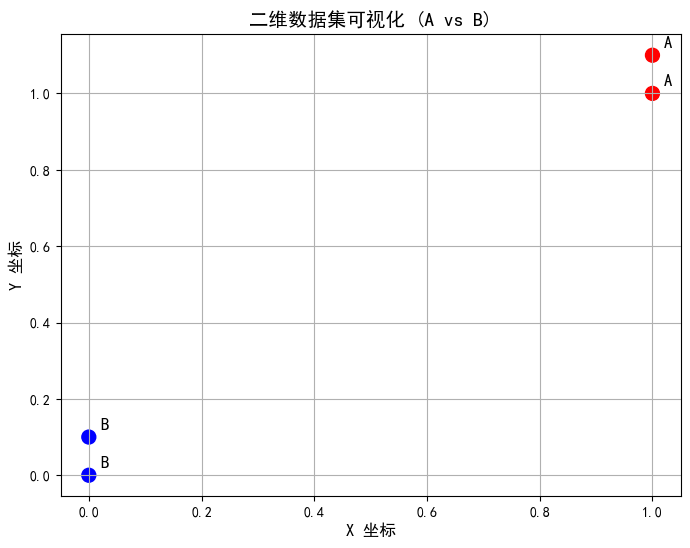

In [13]:
# 提取 x 和 y 坐标
x = groups[:, 0]  # 所有行的第1列（x坐标）
y = groups[:, 1]  # 所有行的第2列（y坐标）

# 创建图形
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=['red' if label == 'A' else 'blue' for label in labels], s=100)  # 按标签着色
plt.xlabel('X 坐标', fontsize=12)
plt.ylabel('Y 坐标', fontsize=12)
plt.title('二维数据集可视化 (A vs B)', fontsize=14)
plt.grid(True)

# 添加标签注释
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi + 0.02, yi + 0.02, labels[i], fontsize=12)  # 避免文字重叠

plt.show()

In [19]:
print(groups, labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]] ['A', 'A', 'B', 'B']


In [13]:
"""
近邻算法（K-Nearest Neighbors, KNN）
对未知类别属性的数据集中的每个点依次执行以下操作：
1. 计算已知类别数据集中的点与当前点之间的距离；
2. 按照距离递增次序排序；
3. 选取与当前点距离最小的k个点；
4. 确定前k个点所在类别的出现频率；
5. 返回前k个点出现频率最高的类别作为当前点的预测分类。
"""
def classify0(inX, dataSet, labels, k):
    """
    参数:
    - inX: 待分类的输入向量（列数需与dataSet一致）
    - dataSet: 已知类别的训练数据集（NumPy数组，每行是一个样本）
    - labels: 训练数据对应的类别标签（列表或数组）
    - k: 近邻算法的k值（选择最近邻的数量）
    
    返回:
    - 输入向量inX的预测类别
    """
    
    # 1. 计算距离
    dataSetSize = dataSet.shape[0]  # 获取训练集的样本数量
    
    # 将输入向量inX复制成与dataSet相同行数的矩阵，方便批量计算
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet  # 计算坐标差值
    
    sqDiffMat = diffMat ** 2  # 差值平方
    sqDistances = sqDiffMat.sum(axis=1)  # 按行求和（欧氏距离的平方）
    distances = sqDistances ** 0.5  # 开平方得到真实欧氏距离
    
    # 2. 按距离从小到大排序，返回的是索引值（不是距离值本身）
    sortedDistIndices = distances.argsort()  
    
    # 3. 统计前k个最近邻的类别
    classCount = {}  # 用字典记录类别及其出现次数
    
    for i in range(k):  # 遍历前k个最近邻
        voteIlabel = labels[sortedDistIndices[i]]  # 获取当前近邻的类别标签
        # 更新字典：如果键不存在则初始化为0，然后+1
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1  

    # 4. 按出现频率从高到低排序
    sortedClassCount = sorted(
        classCount.items(),  # 字典的键值对转为元组列表
        key=lambda x: x[1],  # 按每个元组的第二个元素（即次数）排序
        reverse=True         # 降序排列
    )
    
    # 5. 返回频率最高的类别
    return sortedClassCount[0][0]  # 第一个元组的第一个元素（类别名）

In [29]:
classify0([0,0], groups, labels, 3)

{'B': 2, 'A': 1}


'B'

In [24]:
(((tile([0,0], (4, 1)) - groups) ** 2).sum(axis=1) ** 0.5).argsort()

array([2, 3, 1, 0])

In [25]:
((tile([0,0], (4, 1)) - groups) ** 2).sum(axis=1) ** 0.5

array([1.48660687, 1.41421356, 0.        , 0.1       ])

In [36]:
"""
示例：在约会网站上使用k近邻算法
1. 收集数据：提供文本文件。
2. 准备数据：使用Python解析文本文件。
3. 分析数据：使用Matplotlib画二维扩散图。
4. 训练算法：此步骤不适用于k近邻算法。
5. 测试算法：使用海伦提供的部分数据作为测试样本。
测试样本和非测试样本的区别在于：测试样本是已经完成分类的数
据，如果预测分类与实际类别不同，则标记为一个错误。
6. 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数
据以判断对方是否为自己喜欢的类型
"""
import numpy as np
import pandas as pd
# 随机生成100条约会网站数据
np.random.seed(42)
data_size = 1000

# 特征1：每年飞行里程（0-10万公里）
flight_miles = np.random.randint(0, 100000, size=data_size)

# 特征2：每周游戏时间占比（0-100%）
game_percent = np.random.randint(0, 100, size=data_size)

# 特征3：每周冰淇淋消费（0-20升）
ice_cream = np.random.randint(0, 20, size=data_size)

# 标签：1（不喜欢）、2（一般喜欢）、3（非常喜欢）
labels = np.random.choice([0, 1, 3], size=data_size, p=[0.3, 0.5, 0.2])

# 合并为DataFrame
dating_data = pd.DataFrame({
    '飞行里程': flight_miles,
    '游戏时间占比': game_percent,
    '冰淇淋消费': ice_cream,
    '喜欢程度': labels
})

In [37]:
dating_data

,飞行里程,游戏时间占比,冰淇淋消费,喜欢程度
0,15795,63,0,0
1,860,97,9,1
2,76820,58,7,3
3,54886,55,17,1
4,6265,58,0,1
...,...,...,...,...
995,81449,79,13,3
996,60004,53,8,0
997,62981,85,7,0
998,84659,91,16,3


In [44]:
datingDataMat = dating_data.to_numpy()[:, 0:3]

In [45]:
datingDataMat

array([[15795,    63,     0],
       [  860,    97,     9],
       [76820,    58,     7],
       ...,
       [62981,    85,     7],
       [84659,    91,    16],
       [54553,    19,     1]])

In [46]:
datingLabels = dating_data.to_numpy()[:,3]

In [49]:
datingLabels[:20]

array([0, 1, 3, 1, 1, 0, 1, 3, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 1, 3])

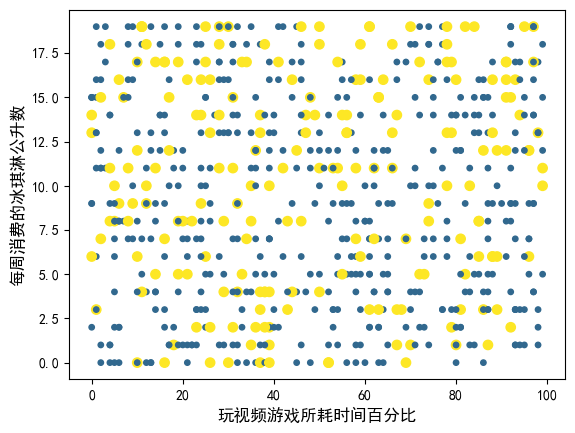

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
plt.xlabel('玩视频游戏所耗时间百分比', fontsize=12)
plt.ylabel('每周消费的冰琪淋公升数', fontsize=12)
plt.show()

In [55]:
# 归一化函数：将数据集中的每个特征缩放到 [0, 1] 范围内
def autoNorm(dataSet):
    """
    参数:
    - dataSet: 输入的数据集（NumPy数组，形状为 [n_samples, n_features]）

    返回:
    - normDataSet: 归一化后的数据集
    - ranges: 每个特征的范围（最大值 - 最小值）
    - minVals: 每个特征的最小值
    """
    
    # 1. 计算每个特征的最小值和最大值（沿第0轴，即列方向）
    minVals = dataSet.min(0)  # 形状: (n_features,)
    maxVals = dataSet.max(0)  # 形状: (n_features,)
    
    # 2. 计算每个特征的范围（最大值 - 最小值）
    ranges = maxVals - minVals  # 形状: (n_features,)
    
    # 3. 初始化归一化后的数据集（形状与输入相同）
    normDataSet = np.zeros(np.shape(dataSet))
    
    # 4. 获取样本数量（行数）
    m = dataSet.shape[0]
    
    # 5. 归一化操作：
    #    a) 减去最小值（将数据平移至以0为起点）
    #    b) 除以范围（缩放到 [0, 1]）
    normDataSet = dataSet - np.tile(minVals, (m, 1))  # np.tile 用于广播操作
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    
    # 6. 返回归一化后的数据、特征范围和最小值
    return normDataSet, ranges, minVals

In [56]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [57]:
normMat

array([[0.15774704, 0.63636364, 0.        ],
       [0.00806775, 0.97979798, 0.47368421],
       [0.76934255, 0.58585859, 0.36842105],
       ...,
       [0.63064742, 0.85858586, 0.36842105],
       [0.84790539, 0.91919192, 0.84210526],
       [0.5461816 , 0.19191919, 0.05263158]])

In [58]:
ranges

array([99780,    99,    19])

In [59]:
minVals

array([55,  0,  0])

In [61]:
def datingClassTest():
    """
    功能：测试约会数据集分类器的错误率（使用KNN算法）
    流程：
        1. 分割数据集为测试集和训练集
        2. 对每个测试样本调用分类器
        3. 统计分类错误率
    """
    
    # 设置测试集比例（10%）
    hoRatio = 0.10  # hold-out ratio

    # 假设已预先加载并归一化的数据：
    # normMat: 归一化后的特征矩阵（形状：[n_samples, n_features]）
    # datingLabels: 对应的标签数组（形状：[n_samples]）
    # 注：原代码中这两变量被注释，实际使用时需取消注释
    # datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    # normMat, ranges, minVals = autoNorm(datingDataMat)

    # 获取样本总数
    m = normMat.shape[0]
    
    # 计算测试集样本数量（取整）
    numTestVecs = int(m * hoRatio)
    
    # 初始化错误计数器
    errorCount = 0.0
    
    # 遍历测试集
    for i in range(numTestVecs):
        # 调用KNN分类器（参数说明见下方）
        classifierResult = classify0(
            normMat[i, :],                  # 当前测试样本特征
            normMat[numTestVecs:m, :],      # 训练集特征（后90%数据）
            datingLabels[numTestVecs:m],    # 训练集标签
            3                              # KNN的k值（取最近的3个邻居）
        )
        """
        KNN分类器调用
            classify0 函数应实现以下逻辑：
            计算测试样本与所有训练样本的距离（如欧氏距离）
            选择距离最近的k个样本
            通过投票机制决定预测标签
        """
        # 打印分类结果与真实标签
        print("分类器返回: %d, 真实标签: %d" % (classifierResult, datingLabels[i]))
        
        # 统计错误分类
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    
    # 计算并输出总错误率
    print("总错误率: %f" % (errorCount / float(numTestVecs)))

In [62]:
datingClassTest()

{np.int64(0): 1, np.int64(1): 1, np.int64(3): 1}
分类器返回: 0, 真实标签: 0
{np.int64(1): 3}
分类器返回: 1, 真实标签: 1
{np.int64(1): 2, np.int64(0): 1}
分类器返回: 1, 真实标签: 3
{np.int64(0): 1, np.int64(3): 2}
分类器返回: 3, 真实标签: 1
{np.int64(1): 3}
分类器返回: 1, 真实标签: 1
{np.int64(0): 1, np.int64(1): 1, np.int64(3): 1}
分类器返回: 0, 真实标签: 0
{np.int64(1): 2, np.int64(3): 1}
分类器返回: 1, 真实标签: 1
{np.int64(0): 1, np.int64(1): 2}
分类器返回: 1, 真实标签: 3
{np.int64(3): 2, np.int64(0): 1}
分类器返回: 3, 真实标签: 1
{np.int64(1): 3}
分类器返回: 1, 真实标签: 1
{np.int64(0): 1, np.int64(1): 1, np.int64(3): 1}
分类器返回: 0, 真实标签: 3
{np.int64(1): 1, np.int64(3): 1, np.int64(0): 1}
分类器返回: 1, 真实标签: 0
{np.int64(0): 1, np.int64(3): 1, np.int64(1): 1}
分类器返回: 0, 真实标签: 1
{np.int64(0): 2, np.int64(1): 1}
分类器返回: 0, 真实标签: 0
{np.int64(0): 1, np.int64(1): 2}
分类器返回: 1, 真实标签: 1
{np.int64(1): 2, np.int64(0): 1}
分类器返回: 1, 真实标签: 1
{np.int64(0): 1, np.int64(1): 2}
分类器返回: 1, 真实标签: 1
{np.int64(0): 2, np.int64(3): 1}
分类器返回: 0, 真实标签: 1
{np.int64(3): 2, np.int64(1): 1}
分类器返回: 3, 真实标签: 1

In [7]:
!python -m pip install --upgrade pip

Looking in indexes: https://mirrors.cloud.tencent.com/pypi/simple


In [8]:
"""
示例：使用k-近邻算法的手写识别系统
1. 收集数据：提供文本文件。
2. 准备数据：编写函数classify0()，将图像格式转换为分类器使用
的list格式。
3. 分析数据：在Python命令提示符中检查数据，确保它符合要求。
4. 训练算法：此步骤不适用于k近邻算法。
5. 测试算法：编写函数使用提供的部分数据集作为测试样本，测试样
本与非测试样本的区别在于测试样本是已经完成分类的数据，如果
预测分类与实际类别不同，则标记为一个错误。
6. 使用算法：本例没有完成此步骤，若你感兴趣可以构建完整的应用
程序，从图像中提取数字，并完成数字识别，美国的邮件分拣系统
就是一个实际运行的类似系统。
"""
import numpy as np

# 读取 semeion.data
data_path = 'semeion.data'
data = np.loadtxt(data_path)

# 分离特征（像素）和标签（one-hot）
X = data[:, :256]      # 前256列是像素（16x16图像展平）
y_onehot = data[:, 256:]  # 后10列是one-hot标签

# 将one-hot标签转换为数字（0-9）
y = np.argmax(y_onehot, axis=1)

print("特征数据形状:", X.shape)  # 应为 (样本数, 256)
print("标签数据形状:", y.shape)  # 应为 (样本数,)

特征数据形状: (1593, 256)
标签数据形状: (1593,)


In [27]:
def handwritingClassTest():

        # 设置测试集比例（10%）
    hoRatio = 0.10  # hold-out ratio

    # 假设已预先加载并归一化的数据：
    # normMat: 归一化后的特征矩阵（形状：[n_samples, n_features]）
    # datingLabels: 对应的标签数组（形状：[n_samples]）
    # 注：原代码中这两变量被注释，实际使用时需取消注释
    # datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    # normMat, ranges, minVals = autoNorm(datingDataMat)

    # 获取样本总数
    m = X.shape[0]
    
    # 计算测试集样本数量（取整）
    numTestVecs = int(m * hoRatio)
    
    # 初始化错误计数器
    errorCount = 0.0

    for i in range(numTestVecs):
        classifierResult = classify0(
            X[i, :],
            X[numTestVecs:, :],
            y[numTestVecs:],
            3
        )
        if (classifierResult != y[i]): errorCount += 1.0
    print("\nthe total number of errors is: %d" % errorCount)
    print("\nthe total error rate is: %f" % (errorCount/m*0.9))

In [28]:
handwritingClassTest()


the total number of errors is: 7

the total error rate is: 0.003955
